In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Membaca dataset
import pandas as pd

df = pd.read_csv("Global_Superstore2.csv", encoding="latin-1")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


## Data preparation

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
df.drop('Postal Code', axis = 1, inplace = True)

Kolom postal code dihapus dari awal karena terdapat banyak value yang NaN. Selain itu, kolom ini pun sudah pasti tidak akan saya gunakan.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

<Axes: >

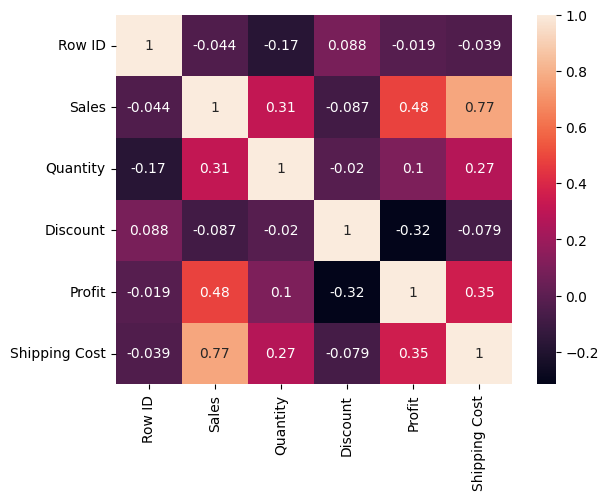

In [ ]:
# Melihat korelasi antar variabel dengan type numerik
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True)

Korelasi tertinggi ada pada kolom Sales dengan Shipping Cost. Saya memilih kolom sales untuk digunakan saat clustering.

## Memilih kolom yang akan digunakan

In [ ]:
selected = df[['Order Date', 'Order ID', 'Customer ID','Sales']]
selected

,Order Date,Order ID,Customer ID,Sales
0,31-07-2012,CA-2012-124891,RH-19495,2309.650
1,05-02-2013,IN-2013-77878,JR-16210,3709.395
2,17-10-2013,IN-2013-71249,CR-12730,5175.171
3,28-01-2013,ES-2013-1579342,KM-16375,2892.510
4,05-11-2013,SG-2013-4320,RH-9495,2832.960
...,...,...,...,...
51285,19-06-2014,IN-2014-62366,KE-16420,65.100
51286,20-06-2014,US-2014-102288,ZC-21910,0.444
51287,02-12-2013,US-2013-155768,LB-16795,22.920
51288,18-02-2012,MX-2012-140767,RB-19795,13.440


Saya memilih kolom Sales yang memiliki korelasi tinggi. Selain itu saya akan melakukan customer segmentation berdasarkan behavior jadi saya memerlukan kolom Order Date dan Order ID.

In [ ]:
# Mengubah type data menjadi datetime
selected['Order Date']= pd.to_datetime(selected['Order Date'], format='%d-%m-%Y')
selected

,Order Date,Order ID,Customer ID,Sales
0,2012-07-31,CA-2012-124891,RH-19495,581.495063
1,2013-02-05,IN-2013-77878,JR-16210,581.495063
2,2013-10-17,IN-2013-71249,CR-12730,581.495063
3,2013-01-28,ES-2013-1579342,KM-16375,581.495063
4,2013-11-05,SG-2013-4320,RH-9495,581.495063
...,...,...,...,...
51285,2014-06-19,IN-2014-62366,KE-16420,65.100000
51286,2014-06-20,US-2014-102288,ZC-21910,0.444000
51287,2013-12-02,US-2013-155768,LB-16795,22.920000
51288,2012-02-18,MX-2012-140767,RB-19795,13.440000


In [ ]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order Date   51290 non-null  datetime64[ns]
 1   Order ID     51290 non-null  object        
 2   Customer ID  51290 non-null  object        
 3   Sales        51290 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.6+ MB


In [ ]:
max = selected['Order Date'].max()
min = selected['Order Date'].min()

print("max order date,", max)
print("min order date,", min)

max order date, 2014-12-31 00:00:00
min order date, 2011-01-01 00:00:00


Maksimal tanggal order dari data tersebut adalah di 2014-12-31 00:00:00

In [ ]:
from datetime import timedelta

# Maksimum tanggal order
max_date = selected['Order Date'].max()

# Hitung tanggal snapshot (satu hari setelah tanggal maksimum)
snapshot_date = max_date + timedelta(days=1)

# Hitung metrik menggunakan groupby, fungsi lambda, dan set indeks
x_selected = selected.set_index('Customer ID').groupby('Customer ID').agg({      #menggabungkan data berdasarkan “Customer ID” dan mengelompokkannya
  'Order Date': lambda x: (snapshot_date - x.max()).days,  # Recency (menghitung recency dengan mengurangkan tanggal transaksi terakhir dari snapshot_date)
  'Order ID': 'count',                                    # Frequency (menghitung frekuensi transaksi)
  'Sales': 'sum'                                           # Spending (menjumlahkan total nilai penjualan)
})

# Ubah nama kolom agar lebih jelas
x_selected.rename(columns={'Order Date': 'Recency', 'Order ID': 'Frequency', 'Sales': 'Spending'}, inplace=True)
x_selected


,Recency,Frequency,Spending
Customer ID,,,
AA-10315,9,42,8134.143250
AA-10375,7,42,5256.125125
AA-10480,126,38,9269.849963
AA-10645,29,73,12306.275960
AA-315,3,8,1813.006125
...,...,...,...
YS-21880,10,54,11620.223562
ZC-11910,201,1,7.173000
ZC-21910,4,84,15541.282135


Pertama, saya menentukan tanggal paling baru ketika pesanan terakhir ditempatkan kemudian diatur satu hari setelah tanggal maksimum untuk digunakan sebagai titik referensi untuk menghitung recency (waktu sejak transaksi terakhir). Kedua, mengelompokkan data berdasarkan Customer ID kemudian menghitung recency dengan mengurangkan tanggal transaksi terakhir dari snapshot_date (Recency), menghitung frekuensi transaksi (Frequency),  dan menghitung jumlah uang yang dikeluarkan atau dihabiskan (Spending).

## K-Means

In [ ]:
# First we need to Scale our Data
scaler = StandardScaler()
scaled = scaler.fit_transform(x_selected)

<Figure size 1000x500 with 0 Axes>

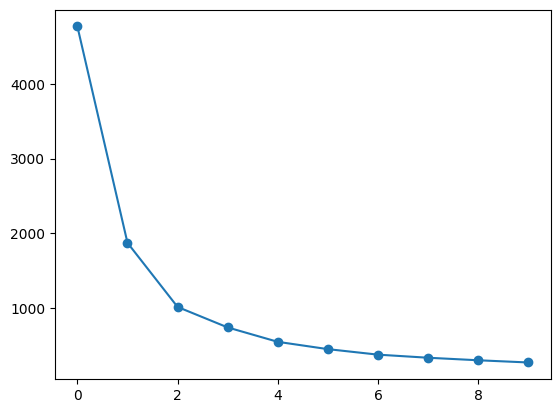

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Let's check for the best n_cluster
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.plot(inertia, marker='o')
plt.figure(figsize=(10,5))

Nilai K optimum adalah K=2 karena berada di titik paling dalam pada elbow method, namun K=3 masih capable untuk dipakai. Saya memutuskan untuk menggunakan K=3 karena masih bisa menjelaskan masing-masing value dari clusternya dalam konteks bisnis. Selain itu, jika klusternya 3 saya bisa melakukan segmentasi lebih spesifik terhadap data.

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
x_selected['Cluster'] = (kmeans.labels_)
x_selected

,Recency,Frequency,Spending,Cluster,Condition,Labels,Cluster Aglo,Cluster DB
Customer ID,,,,,,,,
AA-10315,9,42,8134.143250,0,Super Shoppers,-1,0,-1
AA-10375,7,42,5256.125125,0,Super Shoppers,-1,0,-1
AA-10480,126,38,9269.849963,0,Super Shoppers,-1,0,-1
AA-10645,29,73,12306.275960,0,Super Shoppers,-1,0,-1
AA-315,3,8,1813.006125,1,Regulars,-1,1,-1
...,...,...,...,...,...,...,...,...
YS-21880,10,54,11620.223562,0,Super Shoppers,-1,0,-1
ZC-11910,201,1,7.173000,1,Regulars,-1,1,-1
ZC-21910,4,84,15541.282135,0,Super Shoppers,-1,2,-1


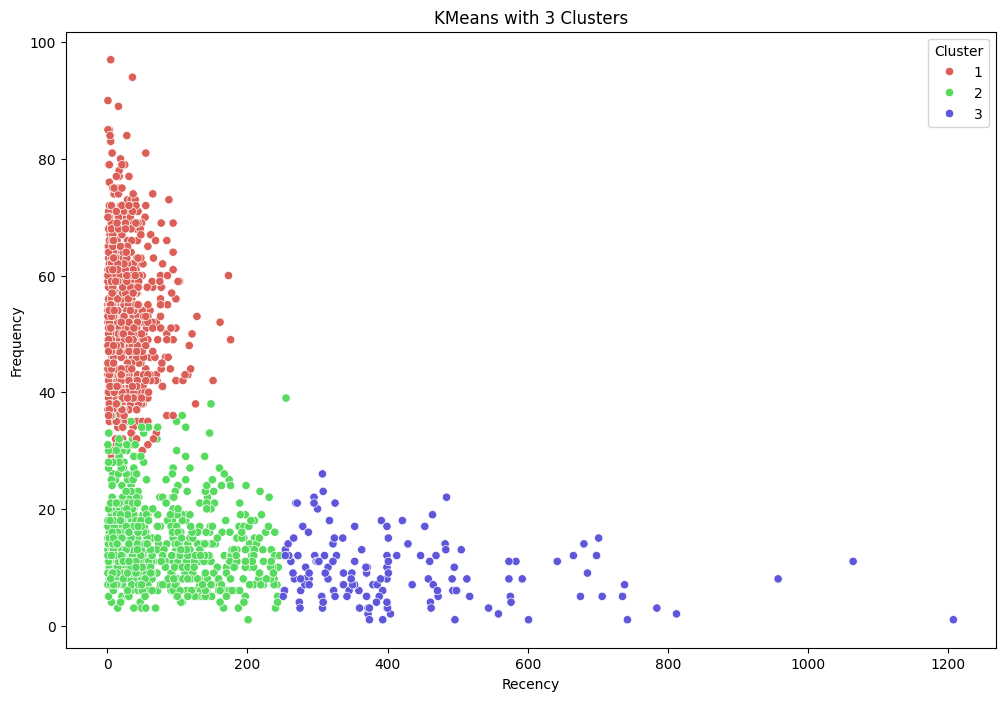

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_selected['Recency'], y=x_selected['Frequency'], hue=x_selected['Cluster'], palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

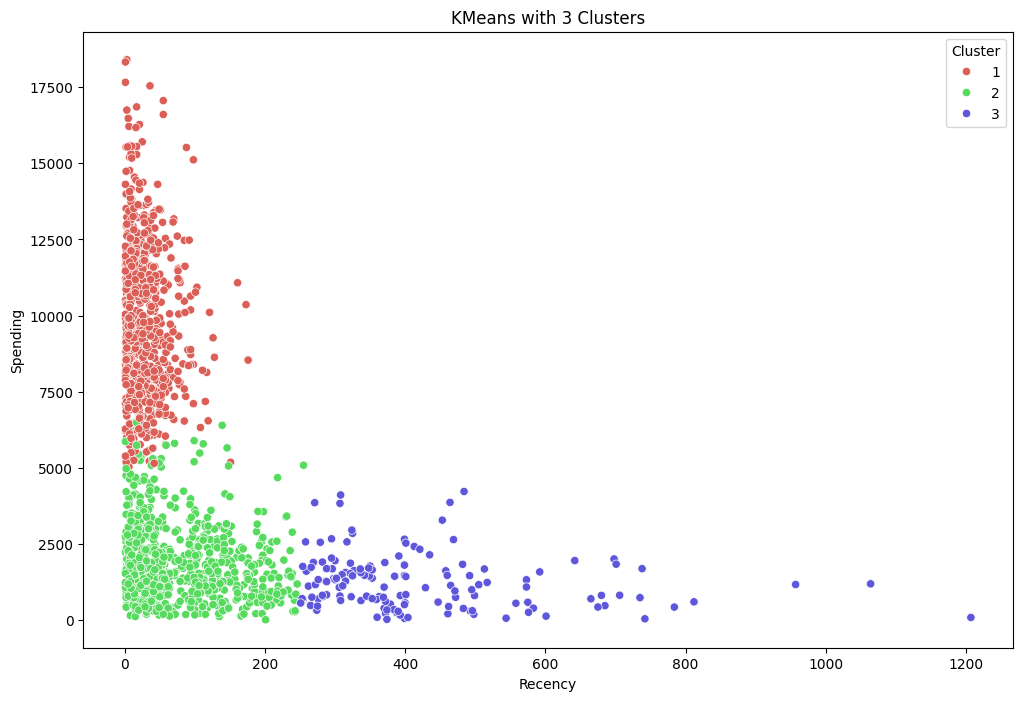

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_selected['Recency'], y=x_selected['Spending'], hue=x_selected['Cluster'], palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

In [ ]:
x_selected.groupby('Cluster')[['Recency','Frequency','Spending']].mean()

,Recency,Frequency,Spending
Cluster,,,
0,27.941255,53.260347,9807.883877
1,78.305158,14.416905,1884.998917
2,421.349650,9.335664,1248.027719


Cluster 1: Recency rendah, Frequency tinggi, Spending tinggi.
Clustering 2: Recency sedang, Frequency sedang, Spending sedang.
Clustering 3: Recency tinggi, Frequency rendah, Spending rendah.

In [ ]:
def func(row):
    if row['Cluster']==1:
        return 'Super Shoppers'
    elif row['Cluster']==2:
        return 'Regulars'
    else:
        return "Inaktif"

In [ ]:
x_selected['Condition'] = x_selected.apply(func, axis=1)
x_selected

,Recency,Frequency,Spending,Cluster,Condition,Labels,Cluster Aglo,Cluster DB
Customer ID,,,,,,,,
AA-10315,9,42,8134.143250,1,Super Shoppers,-1,0,-1
AA-10375,7,42,5256.125125,1,Super Shoppers,-1,0,-1
AA-10480,126,38,9269.849963,1,Super Shoppers,-1,0,-1
AA-10645,29,73,12306.275960,1,Super Shoppers,-1,0,-1
AA-315,3,8,1813.006125,2,Regulars,-1,1,-1
...,...,...,...,...,...,...,...,...
YS-21880,10,54,11620.223562,1,Super Shoppers,-1,0,-1
ZC-11910,201,1,7.173000,2,Regulars,-1,1,-1
ZC-21910,4,84,15541.282135,1,Super Shoppers,-1,2,-1


Saya memberikan nama untuk masing-masing cluster dengan pertimbangan dari value variabelnya yang sudah saya jelaskan karakteristiknya.
Klaster 1: **Super Shoppers**
Pelanggan yang aktif, sering berbelanja, dan menghabiskan banyak uang.
Klaster 2: **Regulars**
Pelanggan dengan perilaku stabil, frekuensi transaksi menengah, dan pengeluaran yang konsisten.
Klaster 3: **Inaktif**
Pelanggan yang sudah lama tidak berbelanja, frekuensi rendah, dan pengeluaran minim.

In [ ]:
# Menghitung jumlah data dalam setiap kondisi (klaster)
results = x_selected['Condition'].value_counts()

# Menghitung persentase masing-masing klaster
total_data = results.sum()
percentages = (results / 1590) * 100

# Menampilkan hasil
results_with_percentages = pd.concat([results, percentages], axis=1)
results_with_percentages.columns = ['Jumlah Data', 'Persentase']
results_with_percentages


,Jumlah Data,Persentase
Condition,,
Super Shoppers,749,47.106918
Regulars,698,43.899371
Inaktif,143,8.993711


Super shoppers mendominasi sebesar 47%, kemudian disusul oleh regulars sebesar 44% dan inaktif hanya sedikit yaitu 9%.

Hasil clustering berdasarkan scatter plot

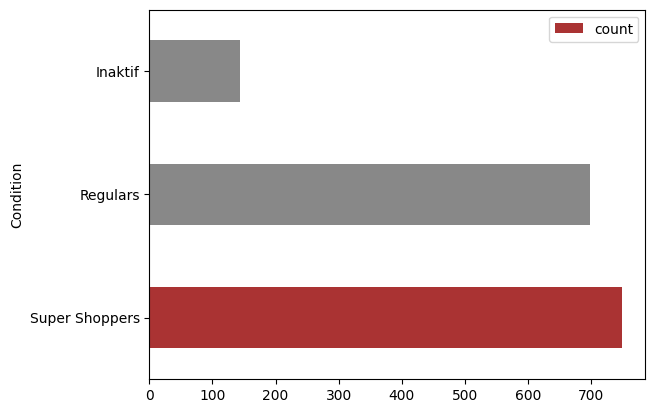

In [ ]:
colors = ['b', 'green', 'y', 'pink','orange','cyan','darkgrey']

ax = results.plot(kind='barh', color=colors, legend=False)

for bar in ax.patches:
    bar.set_facecolor('#888888')

highlight = 'Super Shoppers'
pos = results.index.get_loc(highlight)

ax.patches[pos].set_facecolor('#aa3333')
ax.legend()

# Metode Lainnya (Algomerative, DBSCAN, Silhouette score)

## Aglomerative/Hierarki

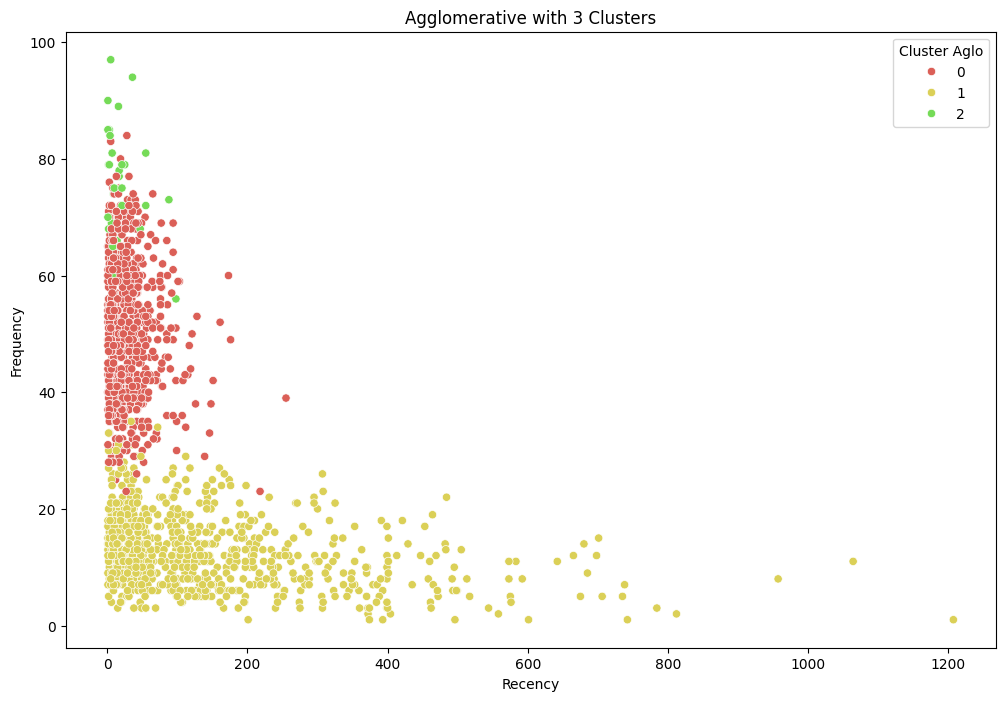

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Menggunakan 'Recency', 'Frequency', dan 'Amount' dari x_selected
agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(x_selected[['Recency', 'Frequency', 'Spending']])

# Menambahkan label hasil clustering ke DataFrame X
x_selected['Cluster Aglo'] = agglom.labels_

# Visualisasi scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_selected['Recency'], y=x_selected['Frequency'], hue=x_selected['Cluster Aglo'],
                palette=sns.color_palette('hls', 7))
plt.title('Agglomerative with 3 Clusters')  # Ubah judul sesuai kebutuhan
plt.show()

Metode ini dimulai dengan memperlakukan setiap objek sebagai klaster tunggal (singleton).
Kemudian, pasangan klaster yang paling mirip secara berturut-turut digabungkan hingga semua objek termasuk dalam satu klaster besar yang berisi semua objek.

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(x_selected[['Recency', 'Frequency', 'Spending']], x_selected[['Recency', 'Frequency', 'Spending']])


In [ ]:
Z = hierarchy.linkage(dist, 'average')

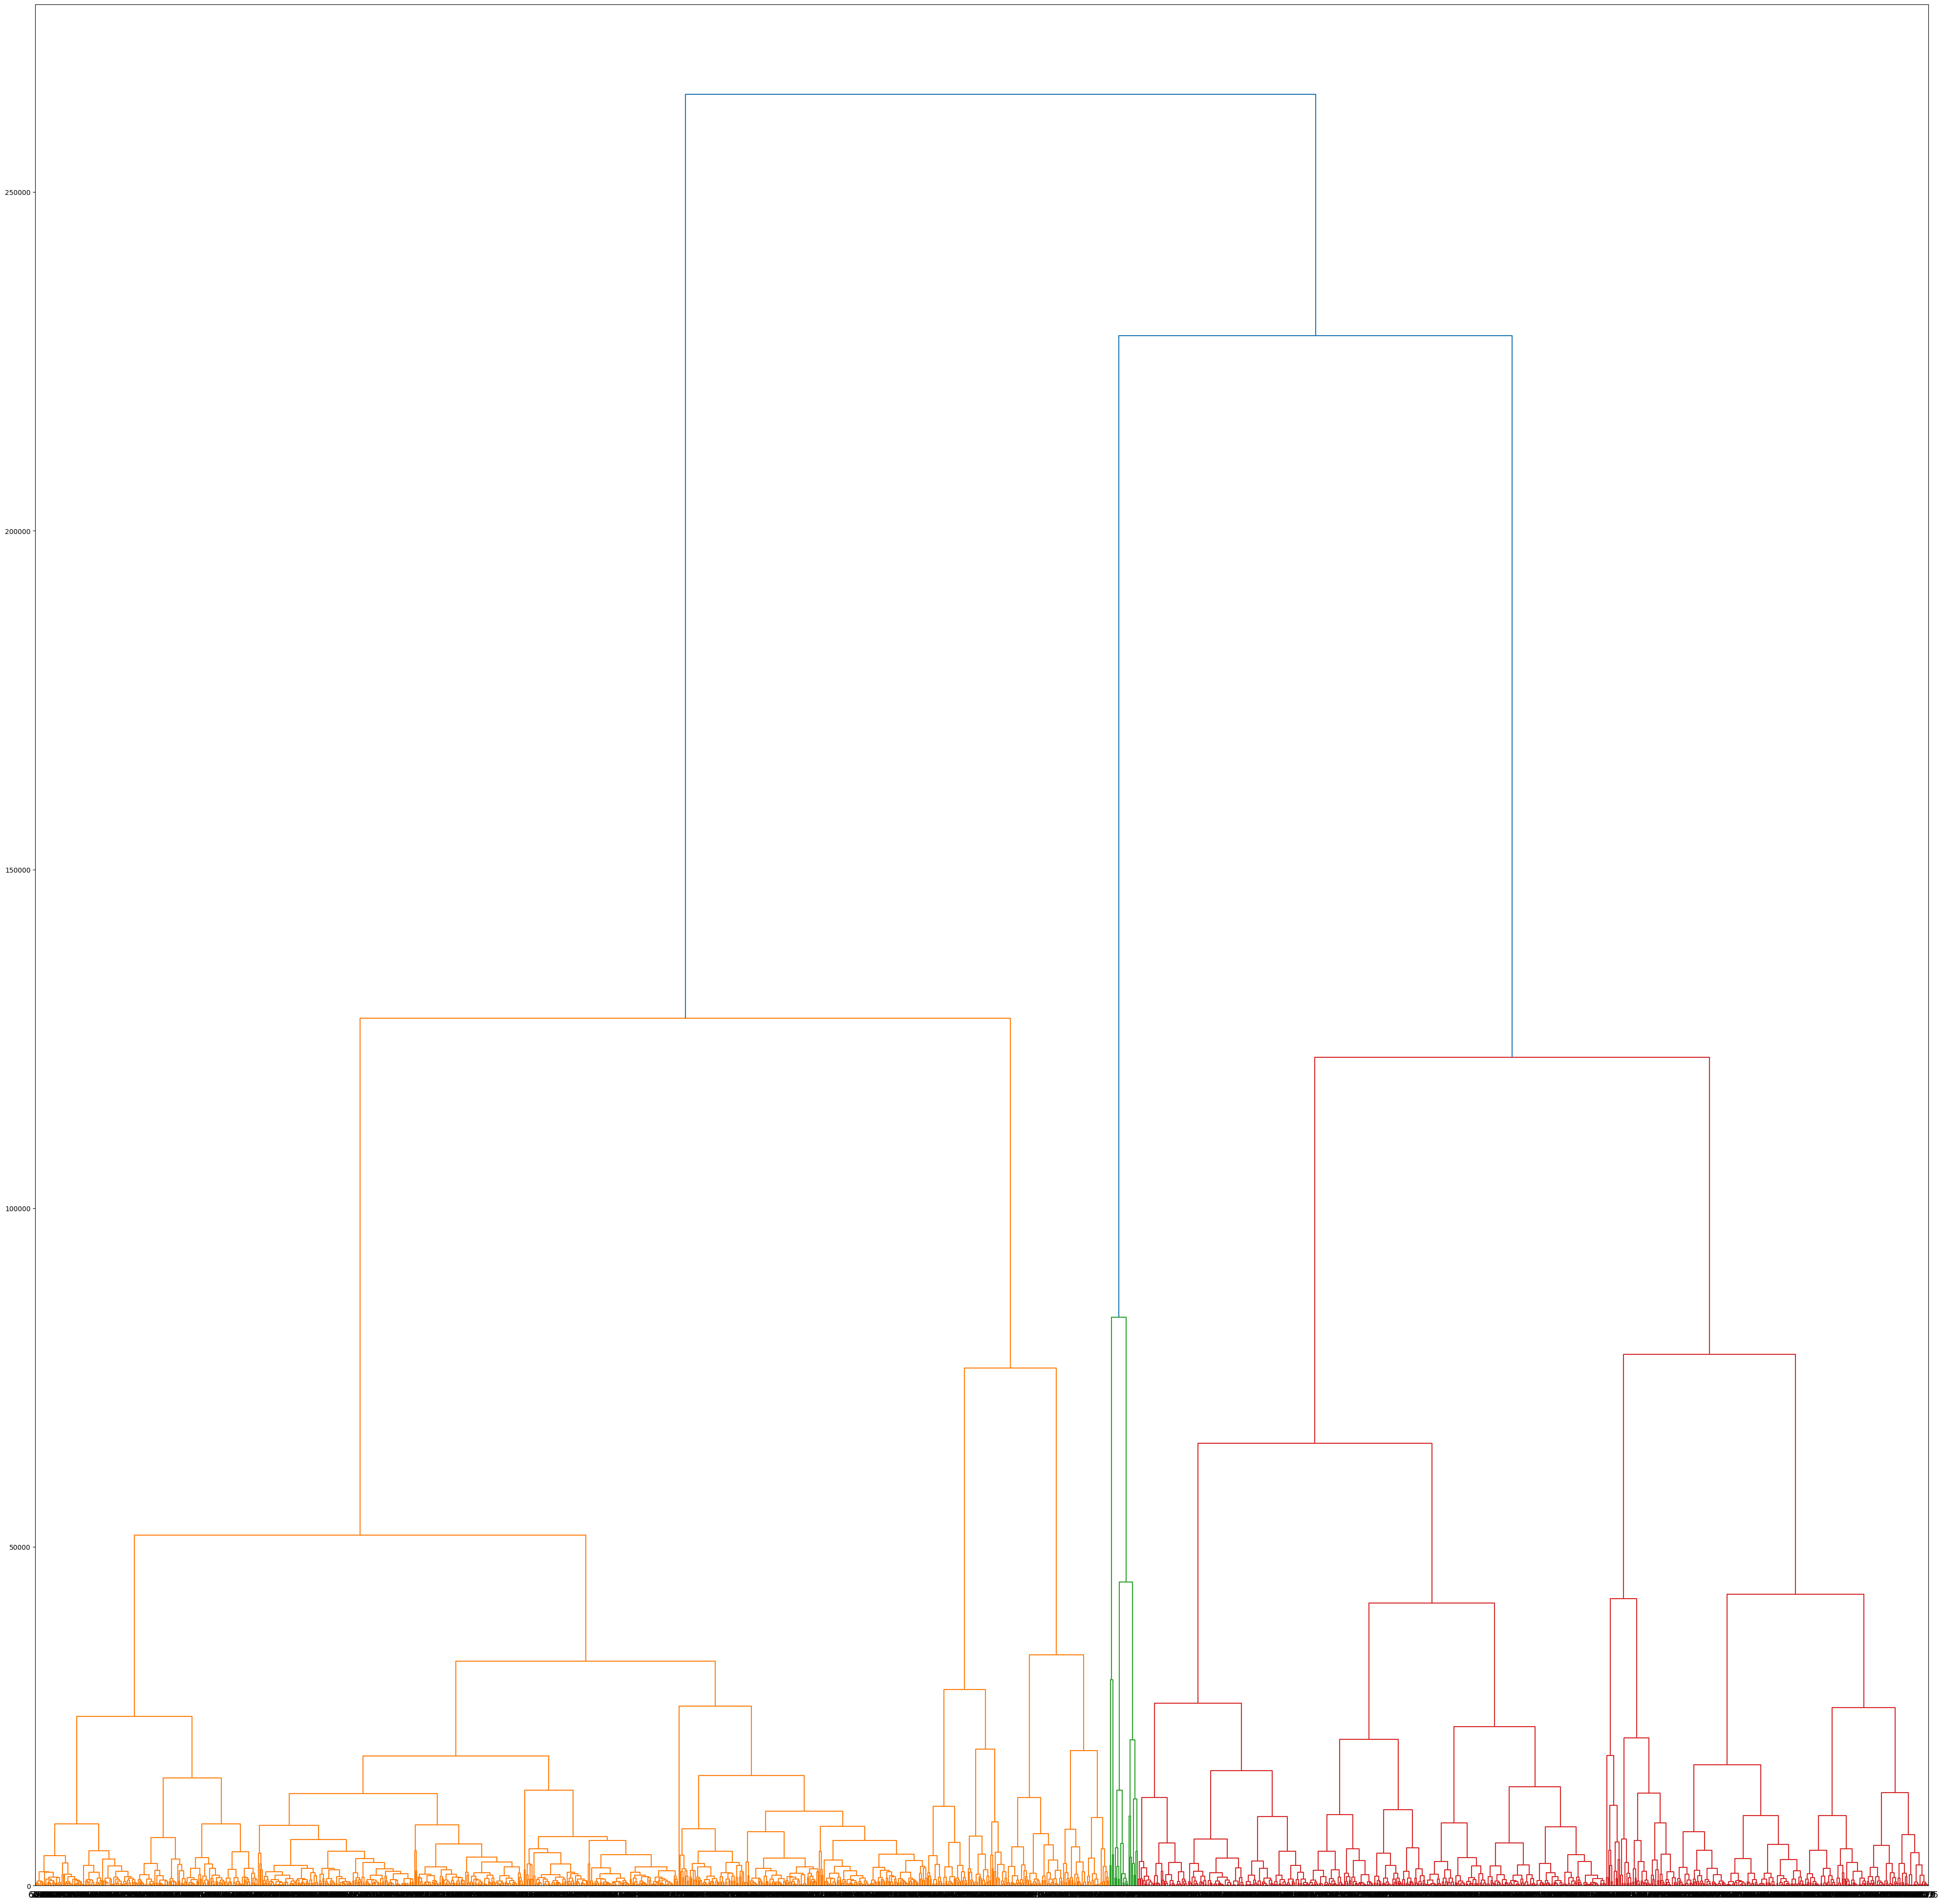

In [ ]:
plt.figure(figsize=(50, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='top')

## DBSCAN

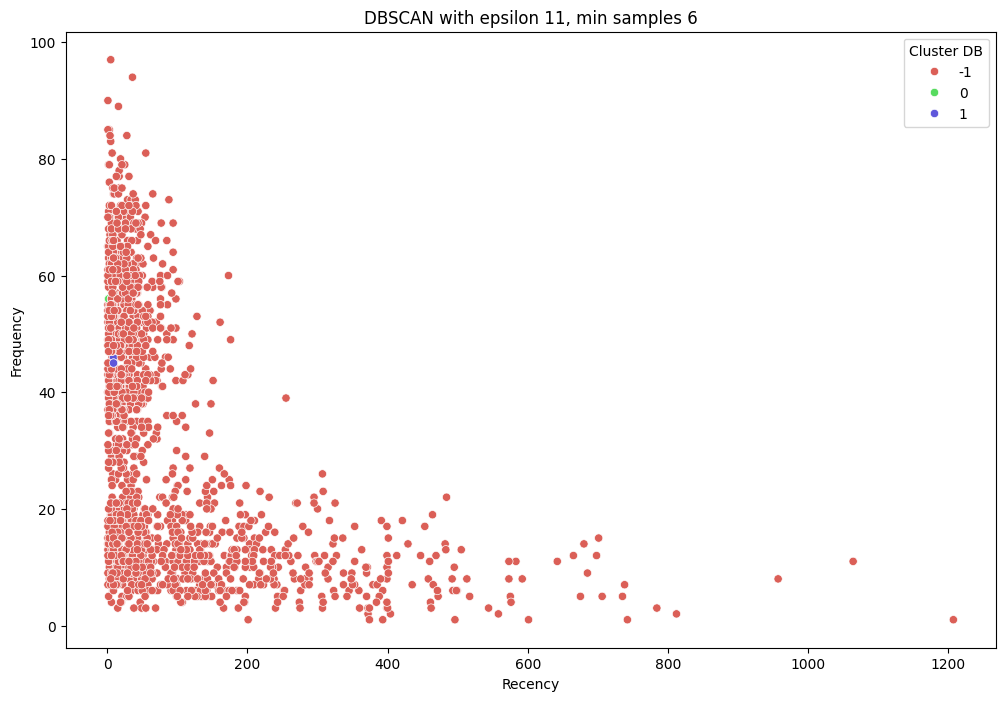

In [ ]:
from sklearn.cluster import DBSCAN

# Menggunakan 'Recency', 'Frequency', dan 'Amount' dari x_selected
db = DBSCAN(eps=2, min_samples=2).fit(x_selected[['Recency', 'Frequency', 'Spending']])

# Menambahkan label hasil clustering ke DataFrame X
x_selected['Cluster DB'] = db.labels_

# Visualisasi scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_selected['Recency'], y=x_selected['Frequency'], hue=x_selected['Cluster DB'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()


Tidak memerlukan jumlah klaster yang telah ditentukan sebelumnya.
Mengidentifikasi outliers sebagai noise, bukan mengklasifikasikannya ke dalam klaster.
Lebih fleksibel dalam hal ukuran dan bentuk klaster dibandingkan metode partisi lainnya seperti K-means.

In [ ]:
x_selected.tail()

,Recency,Frequency,Spending,Cluster,Condition,Labels,Cluster Aglo,Cluster DB
Customer ID,,,,,,,,
YS-21880,10,54,11620.223562,1,Super Shoppers,-1,0,-1
ZC-11910,201,1,7.173000,2,Regulars,-1,1,-1
ZC-21910,4,84,15541.282135,1,Super Shoppers,-1,2,-1
ZD-11925,4,18,2789.141062,2,Regulars,-1,1,-1
ZD-21925,2,36,7728.765938,1,Super Shoppers,-1,0,-1


Hasil cluster yang didapatkan antara cluster dengan metode K-Means dan metode Aglomerative memiliki sedikit kemiripan.

In [ ]:
def describe_by_cluster(x_selected, column):
    stats_by_cluster = x_selected.groupby('Cluster')[column].describe()
    return stats_by_cluster


stats = describe_by_cluster(x_selected, 'Spending')
stats

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
1,749.0,9807.883877,2422.964154,5031.976885,7975.609675,9583.135813,11430.375037,18405.021972
2,698.0,1884.998917,1248.344035,7.173000,1010.922797,1589.259000,2485.762828,6483.943850
3,143.0,1248.027719,888.399677,19.128000,590.554031,1134.653063,1685.657531,4220.020125


## Silhouette score

Rata-rata nilai silhouette: 0.6837861049097943


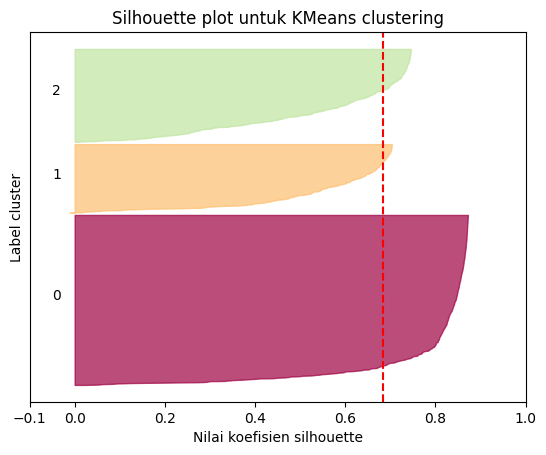

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Menggunakan 3 cluster
n_clusters = 3

# Menggunakan fitur 'Recency', 'Frequency', dan 'Amount' dari x_selected
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(x_selected[['Recency', 'Frequency', 'Spending']])

# Menghitung nilai silhouette
silhouette_avg = silhouette_score(x_selected[['Recency', 'Frequency', 'Spending']], cluster_labels)
print("Rata-rata nilai silhouette:", silhouette_avg)

# Menghitung nilai silhouette untuk setiap sampel
sample_silhouette_values = silhouette_samples(x_selected[['Recency', 'Frequency', 'Spending']], cluster_labels)

# Visualisasi nilai silhouette
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    # Menggabungkan nilai silhouette untuk sampel yang termasuk dalam cluster i dan mengurutkannya
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Menandai plot silhouette dengan nomor cluster di tengahnya
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Menghitung y_lower baru untuk plot berikutnya
    y_lower = y_upper + 10

ax.set_title("Silhouette plot untuk KMeans clustering")
ax.set_xlabel("Nilai koefisien silhouette")
ax.set_ylabel("Label cluster")

# Garis vertikal untuk rata-rata nilai silhouette
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Menghapus label sumbu y
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


Silhouette score for K=2: 0.7324480957840884
Silhouette score for K=3: 0.6837861049097943
Silhouette score for K=4: 0.6490170907620739
Silhouette score for K=5: 0.5601755655389115
Silhouette score for K=6: 0.5537719649258023
Silhouette score for K=7: 0.5401967090363693


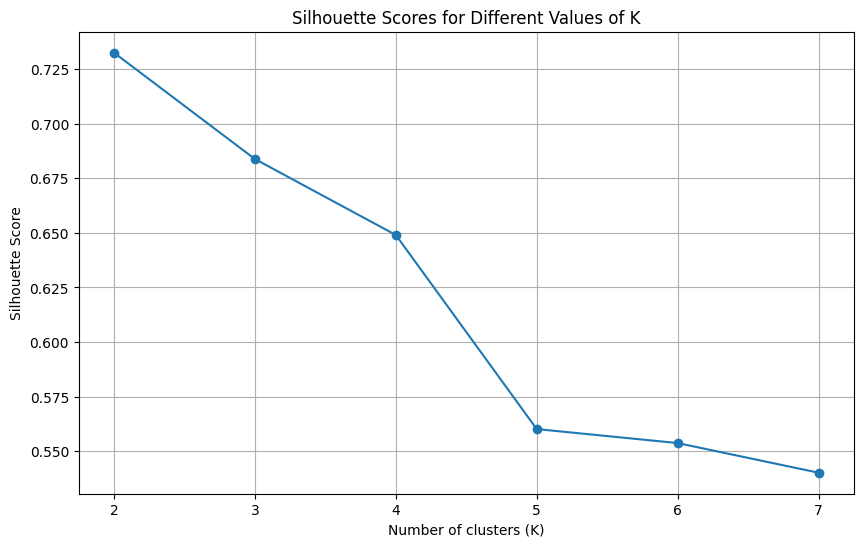

In [ ]:
k_values = range(2, 8)

# List to store silhouette scores
silhouette_scores = []

# Perform clustering and silhouette analysis for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(x_selected[['Recency', 'Frequency', 'Spending']])
    silhouette_avg = silhouette_score((x_selected[['Recency', 'Frequency', 'Spending']]), cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette score for K={k}: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Hasil dari silhouette score menyatakan bahwa K=2 memiliki score tertinggi yaitu 0.7 yang artinya mendekati 1. Hal ini bisa dijadikan sebagai penguat argumen dalam pemilihan nilai K khususnya dalam K-Means. Namun K=3 juga memiliki nilai yang tidak jauh berbeda dengan nilai K=3. Oleh karena itu, saya memilih untuk menggunakan K=3 karena hasil cluster masih bisa dijelaskan dan lebih spesifik dibanding 2.

## Result